In [1]:
import os
import numpy as np
from sklearn.utils import shuffle
from pandas.io.parsers import read_csv

FTRAIN = '../data/training.csv'
FTEST = '../data/test.csv'


def load(test=False, cols=None):
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))

    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    df = df.dropna()

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

In [2]:
%matplotlib inline
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/sanghapark/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
def nn_model():
    model = Sequential()
    model.add(Dense(100, input_dim=9216))
    model.add(Activation('relu'))
    model.add(Dense(30))

    return model


def plot_loss(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    plt.plot(loss, linewidth=3, label='train')
    plt.plot(val_loss, linewidth=3, label='valid')
    plt.grid()
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.ylim(1e-3, 1e-2)
    plt.yscale('log')
    plt.show()


def check_test(model):
    def plot_sample(x, y, axis):
        img = x.reshape(96, 96)
        axis.imshow(img, cmap='gray')
        axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

    X, _ = load(test=True)
    y_pred = model.predict(X)

    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(16):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        plot_sample(X[i], y_pred[i], ax)

    plt.show()

In [4]:
def main():
    PRETRAIN = False

    X, y = load()

    model = nn_model()
    if PRETRAIN:
        model.load_weights('./data/annkeras/ann_model_weights.h5')
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mse', optimizer=sgd)

    hist = model.fit(X, y, nb_epoch=1000, verbose=1, validation_split=0.2)

    model.save_weights('./data/annkeras/ann_model_weights.h5')
    np.savetxt('./data/annkeras/ann_model_loss.csv', hist.history['loss'])
    np.savetxt('./data/annkeras/ann_model_val_loss.csv', hist.history['val_loss'])

    plot_loss(hist)
    check_test(model)

/Users/sanghapark/anaconda/lib/python3.6/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1712 samples, validate on 428 samples
Epoch 1/1000
1712/1712 [==============================] - 0s 260us/step - loss: 0.0537 - val_loss: 0.0144
Epoch 2/1000
1712/1712 [==============================] - 0s 178us/step - loss: 0.0133 - val_loss: 0.0131
Epoch 3/1000
1712/1712 [==============================] - 0s 179us/step - loss: 0.0116 - val_loss: 0.0112
Epoch 4/1000
1712/1712 [==============================] - 0s 176us/step - loss: 0.0105 - val_loss: 0.0101
Epoch 5/1000
1712/1712 [==============================] - 0s 178us/step - loss: 0.0095 - val_loss: 0.0104
Epoch 6/1000
1712/1712 [==============================] - 0s 178us/step - loss: 0.0089 - val_loss: 0.0092
Epoch 7/1000
1712/1712 [==============================] - 0s 180us/step - loss: 0.0084 - val_loss: 0.0085
Epoch 8/1000
1712/1712 [==============================] - 0s 173us/step - loss: 0.0080 - val_loss: 0.0083
Epoch 9/1000
1712/1712 [==============================] - 0s 167us/step - loss: 0.0077 - val_loss: 0.0080

1712/1712 [==============================] - 0s 166us/step - loss: 0.0019 - val_loss: 0.0033
Epoch 154/1000
1712/1712 [==============================] - 0s 166us/step - loss: 0.0019 - val_loss: 0.0033
Epoch 155/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0019 - val_loss: 0.0032
Epoch 156/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0019 - val_loss: 0.0033
Epoch 157/1000
1712/1712 [==============================] - 0s 166us/step - loss: 0.0019 - val_loss: 0.0032
Epoch 158/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0019 - val_loss: 0.0032
Epoch 159/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0019 - val_loss: 0.0032
Epoch 160/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0019 - val_loss: 0.0032
Epoch 161/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0019 - val_loss: 0.0033
Epoch 162/1000
1712/1712 [=================

Epoch 229/1000
1712/1712 [==============================] - 0s 166us/step - loss: 0.0015 - val_loss: 0.0031
Epoch 230/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0016 - val_loss: 0.0029
Epoch 231/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0015 - val_loss: 0.0029
Epoch 232/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0015 - val_loss: 0.0030
Epoch 233/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0015 - val_loss: 0.0030
Epoch 234/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0015 - val_loss: 0.0030
Epoch 235/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0015 - val_loss: 0.0036
Epoch 236/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0015 - val_loss: 0.0030
Epoch 237/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0015 - val_loss: 0.0029
Epoch 238/1000
1712/1712 [==

Epoch 305/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0013 - val_loss: 0.0029
Epoch 306/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0013 - val_loss: 0.0029
Epoch 307/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0014 - val_loss: 0.0029
Epoch 308/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0013 - val_loss: 0.0029
Epoch 309/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0013 - val_loss: 0.0029
Epoch 310/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0013 - val_loss: 0.0029
Epoch 311/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0013 - val_loss: 0.0029
Epoch 312/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0013 - val_loss: 0.0030
Epoch 313/1000
1712/1712 [==============================] - 0s 163us/step - loss: 0.0013 - val_loss: 0.0030
Epoch 314/1000
1712/1712 [==

Epoch 381/1000
1712/1712 [==============================] - 0s 167us/step - loss: 0.0012 - val_loss: 0.0028
Epoch 382/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0012 - val_loss: 0.0029
Epoch 383/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0012 - val_loss: 0.0028
Epoch 384/1000
1712/1712 [==============================] - 0s 166us/step - loss: 0.0012 - val_loss: 0.0029
Epoch 385/1000
1712/1712 [==============================] - 0s 163us/step - loss: 0.0012 - val_loss: 0.0029
Epoch 386/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0012 - val_loss: 0.0030
Epoch 387/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0012 - val_loss: 0.0029
Epoch 388/1000
1712/1712 [==============================] - 0s 167us/step - loss: 0.0012 - val_loss: 0.0028
Epoch 389/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0012 - val_loss: 0.0028
Epoch 390/1000
1712/1712 [==

Epoch 457/1000
1712/1712 [==============================] - 0s 166us/step - loss: 0.0011 - val_loss: 0.0029
Epoch 458/1000
1712/1712 [==============================] - 0s 166us/step - loss: 0.0011 - val_loss: 0.0028
Epoch 459/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0011 - val_loss: 0.0029
Epoch 460/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0011 - val_loss: 0.0028
Epoch 461/1000
1712/1712 [==============================] - 0s 163us/step - loss: 0.0011 - val_loss: 0.0028
Epoch 462/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0011 - val_loss: 0.0028
Epoch 463/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0011 - val_loss: 0.0029
Epoch 464/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0011 - val_loss: 0.0029
Epoch 465/1000
1712/1712 [==============================] - 0s 166us/step - loss: 0.0011 - val_loss: 0.0028
Epoch 466/1000
1712/1712 [==

Epoch 533/1000
1712/1712 [==============================] - 0s 166us/step - loss: 0.0010 - val_loss: 0.0028
Epoch 534/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0010 - val_loss: 0.0029
Epoch 535/1000
1712/1712 [==============================] - 0s 163us/step - loss: 0.0010 - val_loss: 0.0028
Epoch 536/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0010 - val_loss: 0.0028
Epoch 537/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0010 - val_loss: 0.0028
Epoch 538/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0010 - val_loss: 0.0028
Epoch 539/1000
1712/1712 [==============================] - 0s 164us/step - loss: 0.0010 - val_loss: 0.0028
Epoch 540/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0010 - val_loss: 0.0028
Epoch 541/1000
1712/1712 [==============================] - 0s 165us/step - loss: 0.0010 - val_loss: 0.0028
Epoch 542/1000
1712/1712 [==

1712/1712 [==============================] - 0s 167us/step - loss: 9.2199e-04 - val_loss: 0.0028
Epoch 681/1000
1712/1712 [==============================] - 0s 165us/step - loss: 9.1797e-04 - val_loss: 0.0028
Epoch 682/1000
1712/1712 [==============================] - 0s 166us/step - loss: 9.1912e-04 - val_loss: 0.0028
Epoch 683/1000
1712/1712 [==============================] - 0s 165us/step - loss: 9.1766e-04 - val_loss: 0.0028
Epoch 684/1000
1712/1712 [==============================] - 0s 166us/step - loss: 9.1733e-04 - val_loss: 0.0028
Epoch 685/1000
1712/1712 [==============================] - 0s 165us/step - loss: 9.1078e-04 - val_loss: 0.0028
Epoch 686/1000
1712/1712 [==============================] - 0s 166us/step - loss: 9.2120e-04 - val_loss: 0.0028
Epoch 687/1000
1712/1712 [==============================] - 0s 165us/step - loss: 9.1499e-04 - val_loss: 0.0028
Epoch 688/1000
1712/1712 [==============================] - 0s 165us/step - loss: 9.2165e-04 - val_loss: 0.0028
Epoch 6

1712/1712 [==============================] - 0s 171us/step - loss: 8.3322e-04 - val_loss: 0.0028
Epoch 827/1000
1712/1712 [==============================] - 0s 169us/step - loss: 8.2696e-04 - val_loss: 0.0028
Epoch 828/1000
1712/1712 [==============================] - 0s 170us/step - loss: 8.2579e-04 - val_loss: 0.0028
Epoch 829/1000
1712/1712 [==============================] - 0s 169us/step - loss: 8.2170e-04 - val_loss: 0.0028
Epoch 830/1000
1712/1712 [==============================] - 0s 168us/step - loss: 8.2560e-04 - val_loss: 0.0028
Epoch 831/1000
1712/1712 [==============================] - 0s 170us/step - loss: 8.3562e-04 - val_loss: 0.0028
Epoch 832/1000
1712/1712 [==============================] - 0s 170us/step - loss: 8.2768e-04 - val_loss: 0.0028
Epoch 833/1000
1712/1712 [==============================] - 0s 169us/step - loss: 8.2614e-04 - val_loss: 0.0029
Epoch 834/1000
1712/1712 [==============================] - 0s 170us/step - loss: 8.3502e-04 - val_loss: 0.0028
Epoch 8

1712/1712 [==============================] - 0s 180us/step - loss: 7.6088e-04 - val_loss: 0.0029
Epoch 973/1000
1712/1712 [==============================] - 0s 173us/step - loss: 7.6979e-04 - val_loss: 0.0028
Epoch 974/1000
1712/1712 [==============================] - 0s 174us/step - loss: 7.6099e-04 - val_loss: 0.0028
Epoch 975/1000
1712/1712 [==============================] - 0s 169us/step - loss: 7.6516e-04 - val_loss: 0.0028
Epoch 976/1000
1712/1712 [==============================] - 0s 174us/step - loss: 7.6160e-04 - val_loss: 0.0029
Epoch 977/1000
1712/1712 [==============================] - 0s 173us/step - loss: 7.6101e-04 - val_loss: 0.0028
Epoch 978/1000
1712/1712 [==============================] - 0s 175us/step - loss: 7.6169e-04 - val_loss: 0.0029
Epoch 979/1000
1712/1712 [==============================] - 0s 174us/step - loss: 7.7238e-04 - val_loss: 0.0028
Epoch 980/1000
1712/1712 [==============================] - 0s 174us/step - loss: 7.6469e-04 - val_loss: 0.0028
Epoch 9

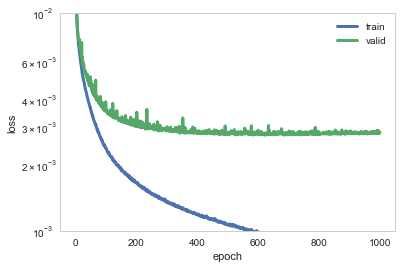

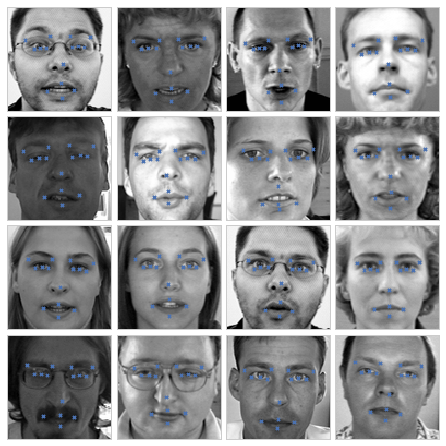

In [5]:
main()